In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import category_encoders as ce

import warnings
warnings.filterwarnings("ignore") 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_curve, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import precision_recall_curve, average_precision_score ,precision_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler , label_binarize
from xgboost.sklearn import XGBClassifier

import plotly.graph_objects as go
from nltk.corpus import stopwords

In [99]:
# reading and  loading the dataset 
df = pd.read_csv("finaldata/US_Accidents_Dec21_updated.csv")       #read the dataset

df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [100]:
# https://towardsdatascience.com/feature-engineering-on-date-time-data-90f6e954e6b8 helped to change to datetime
# using Start_Time column to extraxt datetime function to extract month, weekdat ,day, hour and minute
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute
df["Second"] = df["Start_Time"].dt.second

df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute,Second
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,Night,Night,Night,2016,2,0,8,0,37,8
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,Night,Night,Night,2016,2,0,8,5,56,20
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,Night,Night,Day,2016,2,0,8,6,15,39
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,Night,Day,Day,2016,2,0,8,6,51,45
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,Day,Day,Day,2016,2,0,8,7,53,43


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 54 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               object        
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

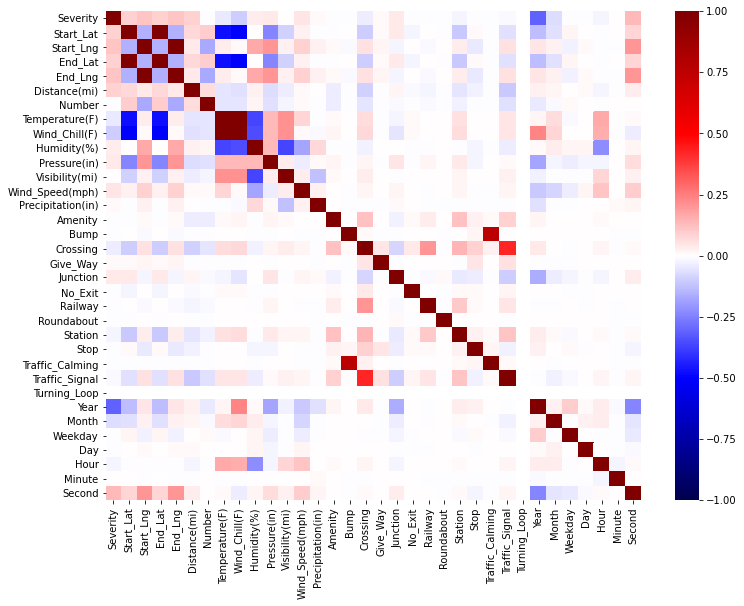

In [102]:
cmatrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(cmatrix,vmin=-1, vmax=1 ,cmap="seismic")

plt.show()

In [103]:
drop = ["ID", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Description", "Number", "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight","Second"]
df = df.drop(drop, axis=1)
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,3.230,R,Dublin,42.1,58.0,29.76,10.0,...,False,False,False,Night,2016,2,0,8,0,37
1,2,39.865420,-84.062800,0.747,R,Dayton,36.9,91.0,29.68,10.0,...,False,False,False,Night,2016,2,0,8,5,56
2,2,39.102660,-84.524680,0.055,R,Cincinnati,36.0,97.0,29.70,10.0,...,False,False,False,Night,2016,2,0,8,6,15
3,2,41.062130,-81.537840,0.123,R,Akron,39.0,55.0,29.65,10.0,...,False,False,False,Night,2016,2,0,8,6,51
4,3,39.172393,-84.492792,0.500,R,Cincinnati,37.0,93.0,29.69,10.0,...,False,False,False,Day,2016,2,0,8,7,53


In [104]:
#drop duplicate rows
df.drop_duplicates(inplace=True)
print( len(df.index))

2646365


In [105]:

df[["Pressure(in)", "Visibility(mi)","Temperature(F)","Humidity(%)"]].describe().round(2)

,Pressure(in),Visibility(mi),Temperature(F),Humidity(%)
count,2590814.00,2580133.00,2581425.00,2577856.00
mean,29.47,9.10,61.72,64.37
std,1.04,2.74,18.66,22.93
min,0.00,0.00,-89.00,1.00
25%,29.31,10.00,50.00,48.00
50%,29.82,10.00,63.10,67.00
75%,30.01,10.00,76.00,83.00
max,58.90,140.00,196.00,100.00


In [106]:
df = df[df["Pressure(in)"] != 0]
df= df[df["Visibility(mi)"] != 0]
df[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,2587863.00,2577181.00
mean,29.48,9.11
std,1.04,2.72
min,0.02,0.06
25%,29.31,10.00
50%,29.82,10.00
75%,30.01,10.00
max,58.90,140.00


In [107]:
#handle missing values
df["Side"].value_counts()

R    2202074
L     441337
N          1
Name: Side, dtype: int64

In [108]:
df = df[df["Side"] != 'N']
df["Side"].value_counts()

R    2202074
L     441337
Name: Side, dtype: int64

In [109]:
#reduce number of unique conditions
unique_w = df["Weather_Condition"].unique()
print(unique_w)
print(len(unique_w))


['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Volcanic Ash' 'Freezing Rain / Windy' 'Small Hail' 'W

In [110]:
# https://www.kaggle.com/code/nihalgajbhiye/usa-car-accidents-severity-prediction#3-Data-Preprocessing this link helped to incorporate
#this piece of code
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunder"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snowy"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rainy"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Foggy"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(df["Weather_Condition"].unique())

['Rainy' 'Cloudy' 'Snowy' nan 'Clear' 'Foggy' 'Thunder' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


In [111]:
df["Wind_Direction"].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [112]:
# https://www.kaggle.com/code/nihalgajbhiye/usa-car-accidents-severity-prediction#3-Data-Preprocessing this link helped to incorporate
#this piece of code
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"

df["Wind_Direction"] = df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

df["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'Variable',
       'NE'], dtype=object)

In [113]:
df.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Side                      0
City                    134
Temperature(F)        64919
Humidity(%)           68451
Pressure(in)          55548
Visibility(mi)        66230
Wind_Direction        68729
Wind_Speed(mph)      152343
Precipitation(in)    538376
Weather_Condition     67336
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Civil_Twilight         2652
Year                      0
Month                     0
Weekday                   0
Day                       0
Hour                      0
Minute                    0
dtype: int64

In [114]:
dfn = df.copy()

In [115]:
#missing values
#replaceing with mean, median, mode
df_mean= df.copy()
df_median= df.copy()
df_mode= df.copy()
missing = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
df_mean[missing] = df[missing].fillna(df[missing].mean())
df_median[missing]=df[missing].fillna(df[missing].median())
df_mode[missing]=df[missing].fillna(df[missing].mode())
#categorical values we are removing rows
df_mean.dropna(inplace=True)
#df_mean.isna().sum()

df_median.dropna(inplace=True)
df_median.isna().sum()

df_mode.dropna(inplace=True)
#df_mode.isna().sum()

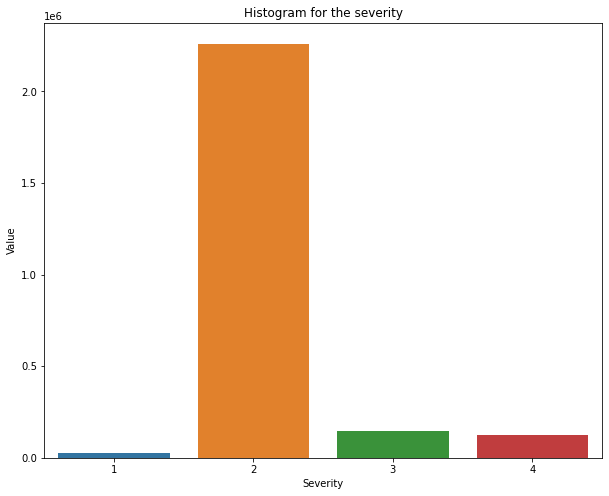

In [116]:
#handle unbalanced data 
severity = df_mean["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity.index, severity.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [117]:
#why undersampling 
size = len(df_mean[df_mean["Severity"]==1].index)
dfnn = pd.DataFrame()
for i in range(1,5):
    S = df_mean[df_mean["Severity"]==i]
    dfnn = dfnn.append(S.sample(size, random_state=30))
undersampled = dfnn

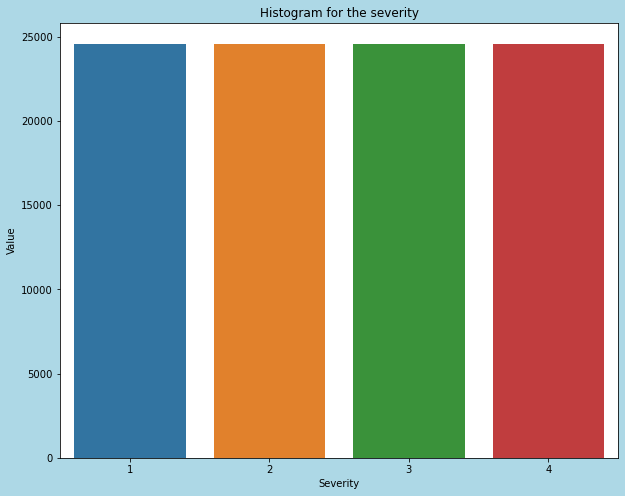

In [118]:
severity = undersampled["Severity"].value_counts()
plt.figure(figsize=(10, 8),facecolor="lightblue",edgecolor="lightblue")
plt.title("Histogram for the severity")
sns.barplot(severity.index, severity.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [119]:
#feature scaling by normalizing values of continuous features
df_scaled = undersampled.copy()
scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
df_scaled[features] = scaler.fit_transform(df_scaled[features])
df_scaled

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
2152039,1,0.705147,0.934821,0.000000,R,Providence,0.697396,0.755102,0.876224,0.089598,...,False,False,False,Day,0.8,0.454545,0.000000,0.933333,0.391304,0.898305
2104594,1,0.533141,0.042586,0.000027,R,Union City,0.683322,0.428571,0.886020,0.089598,...,False,False,False,Day,0.8,0.363636,0.500000,0.200000,0.826087,0.254237
2100247,1,0.293952,0.319359,0.000000,R,El Paso,0.753695,0.173469,0.561888,0.071570,...,False,False,True,Day,0.8,0.363636,0.166667,0.133333,0.608696,0.813559
2253361,1,0.519332,0.041481,0.000000,R,Los Gatos,0.584799,0.744898,0.897596,0.089598,...,False,False,False,Day,0.8,0.272727,1.000000,0.366667,0.826087,0.813559
2111053,1,0.478161,0.666317,0.000000,R,Old Hickory,0.584799,0.336735,0.867320,0.089598,...,False,False,False,Day,0.8,0.363636,0.000000,0.333333,0.434783,0.474576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571312,4,0.384166,0.818116,0.006701,L,Southport,0.718508,0.806122,0.903829,0.089598,...,False,False,False,Day,0.4,0.909091,0.166667,0.166667,0.478261,0.016949
2808900,4,0.388570,0.117389,0.000187,R,San Dimas,0.619986,0.816327,0.804987,0.026501,...,False,False,False,Day,0.6,0.454545,0.333333,0.600000,0.347826,0.966102
2093484,4,0.698560,0.721851,0.001156,L,Oregon,0.535538,0.673469,0.813891,0.089598,...,False,False,False,Day,0.8,0.272727,0.500000,0.966667,0.826087,0.610169
2782711,4,0.706134,0.903958,0.004596,R,Torrington,0.479240,0.755102,0.824577,0.089598,...,False,False,False,Night,0.6,0.272727,0.500000,0.800000,0.000000,0.847458


In [120]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98312 entries, 2152039 to 2236155
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           98312 non-null  int64  
 1   Start_Lat          98312 non-null  float64
 2   Start_Lng          98312 non-null  float64
 3   Distance(mi)       98312 non-null  float64
 4   Side               98312 non-null  object 
 5   City               98312 non-null  object 
 6   Temperature(F)     98312 non-null  float64
 7   Humidity(%)        98312 non-null  float64
 8   Pressure(in)       98312 non-null  float64
 9   Visibility(mi)     98312 non-null  float64
 10  Wind_Direction     98312 non-null  object 
 11  Wind_Speed(mph)    98312 non-null  float64
 12  Precipitation(in)  98312 non-null  float64
 13  Weather_Condition  98312 non-null  object 
 14  Amenity            98312 non-null  bool   
 15  Bump               98312 non-null  bool   
 16  Crossing      

In [121]:
df_scaled = df_scaled.replace([True, False], [1, 0])

df_scaled.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
2152039,1,0.705147,0.934821,0.000000,R,Providence,0.697396,0.755102,0.876224,0.089598,...,0,0,0,Day,0.8,0.454545,0.000000,0.933333,0.391304,0.898305
2104594,1,0.533141,0.042586,0.000027,R,Union City,0.683322,0.428571,0.886020,0.089598,...,0,0,0,Day,0.8,0.363636,0.500000,0.200000,0.826087,0.254237
2100247,1,0.293952,0.319359,0.000000,R,El Paso,0.753695,0.173469,0.561888,0.071570,...,0,0,1,Day,0.8,0.363636,0.166667,0.133333,0.608696,0.813559
2253361,1,0.519332,0.041481,0.000000,R,Los Gatos,0.584799,0.744898,0.897596,0.089598,...,0,0,0,Day,0.8,0.272727,1.000000,0.366667,0.826087,0.813559
2111053,1,0.478161,0.666317,0.000000,R,Old Hickory,0.584799,0.336735,0.867320,0.089598,...,0,0,0,Day,0.8,0.363636,0.000000,0.333333,0.434783,0.474576


In [122]:
onehot_cols = ["Side", "Wind_Direction", "Weather_Condition", "Civil_Twilight"]

df_scaled= pd.get_dummies(df_scaled, columns=onehot_cols, drop_first=True)

df_scaled.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Weather_Condition_Cloudy,Weather_Condition_Foggy,Weather_Condition_Hail,Weather_Condition_Rainy,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snowy,Weather_Condition_Thunder,Weather_Condition_Windy,Civil_Twilight_Night
2152039,1,0.705147,0.934821,0.000000,Providence,0.697396,0.755102,0.876224,0.089598,0.041420,...,1,0,0,0,0,0,0,0,0,0
2104594,1,0.533141,0.042586,0.000027,Union City,0.683322,0.428571,0.886020,0.089598,0.047337,...,0,0,0,0,0,0,0,0,0,0
2100247,1,0.293952,0.319359,0.000000,El Paso,0.753695,0.173469,0.561888,0.071570,0.124260,...,0,0,0,0,0,0,0,0,1,0
2253361,1,0.519332,0.041481,0.000000,Los Gatos,0.584799,0.744898,0.897596,0.089598,0.047337,...,1,0,0,0,0,0,0,0,0,0
2111053,1,0.478161,0.666317,0.000000,Old Hickory,0.584799,0.336735,0.867320,0.089598,0.088757,...,0,0,0,0,0,0,0,0,0,0


In [123]:
bin_encoder = ce.binary.BinaryEncoder()

city= bin_encoder.fit_transform(df_scaled["City"])
city

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
2152039,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2104594,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2100247,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2253361,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2111053,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571312,0,0,1,0,0,1,0,1,1,0,1,1,0,1
2808900,0,0,1,0,0,0,1,1,0,0,1,1,1,1
2093484,0,0,1,0,0,1,0,1,0,0,0,1,0,1
2782711,0,1,0,1,0,1,1,1,1,0,1,1,1,1


In [124]:
df_scaled= pd.concat([df_scaled, city], axis=1).drop("City", axis=1)

df_scaled.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
2152039,1,0.705147,0.934821,0.000000,0.697396,0.755102,0.876224,0.089598,0.041420,0.000000,...,0,0,0,0,0,0,0,0,0,1
2104594,1,0.533141,0.042586,0.000027,0.683322,0.428571,0.886020,0.089598,0.047337,0.000000,...,0,0,0,0,0,0,0,0,1,0
2100247,1,0.293952,0.319359,0.000000,0.753695,0.173469,0.561888,0.071570,0.124260,0.000713,...,0,0,0,0,0,0,0,0,1,1
2253361,1,0.519332,0.041481,0.000000,0.584799,0.744898,0.897596,0.089598,0.047337,0.000000,...,0,0,0,0,0,0,0,1,0,0
2111053,1,0.478161,0.666317,0.000000,0.584799,0.336735,0.867320,0.089598,0.088757,0.000000,...,0,0,0,0,0,0,0,1,0,1


USE ALGORITHMS

In [125]:
# Train/Test Split
x = df_scaled.drop("Severity", axis=1)
y = df_scaled.Severity
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0, stratify=y)
print(f'Train: {x_train.shape} \n Test : {x_test.shape}')


Train: (68818, 61) 
 Test : (29494, 61)


In [126]:
#this function will help to draw a confusion matrix
def conf_matrix(classifier):
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title("Confusion Matrix")
    plt.show()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
training score:0.645
testing score:0.645
Best parameters scores:
{'solver': 'saga'}


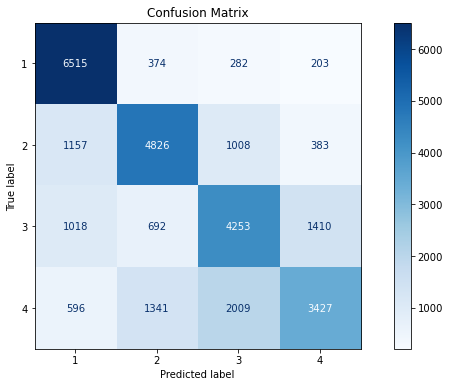

              precision    recall  f1-score   support

           1       0.70      0.88      0.78      7374
           2       0.67      0.65      0.66      7374
           3       0.56      0.58      0.57      7373
           4       0.63      0.46      0.54      7373

    accuracy                           0.64     29494
   macro avg       0.64      0.64      0.64     29494
weighted avg       0.64      0.64      0.64     29494

balanced accuracy: 0.645
roc: 0.856


In [127]:
# Logistic Regression
logistic = LogisticRegression(random_state=0, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
logistic_regression = GridSearchCV(logistic, params, n_jobs=-1, verbose=5)
logistic_regression.fit(x_train, y_train)
logistic_regression_predictions = logistic_regression.predict(x_test)
logistic_regression_results = classification_report(y_test, logistic_regression_predictions, zero_division=True, output_dict=True)

#training and testing score
score_logi= logistic_regression.score(x_train,y_train)
print("training score:{:.3f}".format(score_logi))
score_logi_test=logistic_regression.score(x_test,y_test)
print("testing score:{:.3f}".format(score_logi_test))


#best hyperparameter
print("Best parameters scores:")
print(logistic_regression.best_params_)

# Confusion matrix and Classification report
conf_matrix(logistic_regression)
print(classification_report(y_test, logistic_regression_predictions, zero_division=True))

# balanced_accuracy

logistic_balanced_accuracy = balanced_accuracy_score(y_test, logistic_regression_predictions)
print("balanced accuracy: {:.3f}".format(logistic_balanced_accuracy))


logistic_roc_auc = roc_auc_score(y_test, logistic_regression.predict_proba(x_test) , multi_class='ovo') 
print("roc: {:.3f}".format(logistic_roc_auc)) 

In [128]:
from sklearn.metrics import  f1_score, roc_curve,recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score 

In [129]:
#predictions
logi_pre=precision_score(y_test,logistic_regression_predictions,average="macro")
print("precision logistic: {:.3f}".format(logi_pre)) 
rmse = np.sqrt( mean_squared_error(y_test,logistic_regression_predictions))
r2 = r2_score(y_test,logistic_regression_predictions )
recall = recall_score(y_test,logistic_regression_predictions,average="macro")
Fone= f1_score(y_test,logistic_regression_predictions,average="macro")
print("rmse = {:.3f}".format(rmse))
print("r2 = {:.3f}".format(r2))
print("recall = {:.3f}".format(recall))
print("f1 = {:.3f}".format(Fone))

 


precision logistic: 0.641
rmse = 0.938
r2 = 0.296
recall = 0.645
f1 = 0.637


training score:0.954
testing score:0.710
Best parameters scores:
{'splitter': 'best', 'min_samples_leaf': 2, 'criterion': 'gini'}


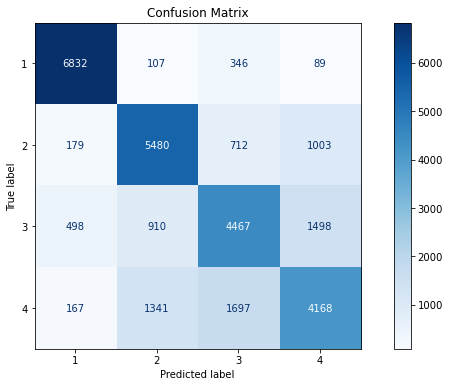

              precision    recall  f1-score   support

           1       0.89      0.93      0.91      7374
           2       0.70      0.74      0.72      7374
           3       0.62      0.61      0.61      7373
           4       0.62      0.57      0.59      7373

    accuracy                           0.71     29494
   macro avg       0.71      0.71      0.71     29494
weighted avg       0.71      0.71      0.71     29494

balanced accuracy: 0.710
roc: 0.826


In [130]:
# Decision Tree 
decision_tree_ = DecisionTreeClassifier(random_state=0)
params_tree = {"splitter": ["best", "random"],
                "criterion":["gini","entropy"],
                "min_samples_leaf":[1,2]
                }
decision_tree = RandomizedSearchCV(decision_tree_, params_tree,n_iter=6)
decision_tree.fit(x_train, y_train)
decision_tree_predictions = decision_tree.predict(x_test)
decision_tree_results = classification_report(y_test, decision_tree_predictions, zero_division=True, output_dict=True)

#training and training score

score_dt= decision_tree.score(x_train,y_train)
print("training score:{:.3f}".format(score_dt))
score_dt_test=decision_tree.score(x_test,y_test)
print("testing score:{:.3f}".format(score_dt_test))
#best hyperparameters
print("Best parameters scores:")
print(decision_tree.best_params_)

# Confusion matrix and Classification report
conf_matrix(decision_tree)
print(classification_report(y_test, decision_tree_predictions, zero_division=True))

# balanced_accuracy

decision_tree_balanced_accuracy = balanced_accuracy_score(y_test, decision_tree_predictions)
print("balanced accuracy: {:.3f}".format(decision_tree_balanced_accuracy)) 

# ROC_AUC score
decision_tree_roc = roc_auc_score(y_test, decision_tree.predict_proba(x_test), multi_class='ovo', average='macro') 

print("roc: {:.3f}".format(decision_tree_roc)) 


In [131]:
logi_pre=precision_score(y_test,decision_tree_predictions,average="macro")
print("decision tree logistic: {:.3f}".format(logi_pre)) 
rmse = np.sqrt( mean_squared_error(y_test,decision_tree_predictions))
r2 = r2_score(y_test,decision_tree_predictions )
recall = recall_score(y_test,decision_tree_predictions,average="macro")
Fone= f1_score(y_test,decision_tree_predictions,average="macro")
print("rmse = {:.3f}".format(rmse))
print("r2 = {:.3f}".format(r2))
print("recall = {:.3f}".format(recall))
print("f1 = {:.3f}".format(Fone))


decision tree logistic: 0.706
rmse = 0.827
r2 = 0.453
recall = 0.710
f1 = 0.708


training score:1.000
testing score:0.777
Best parameters scores:
{'n_estimators': 100, 'min_samples_leaf': 1, 'criterion': 'entropy'}


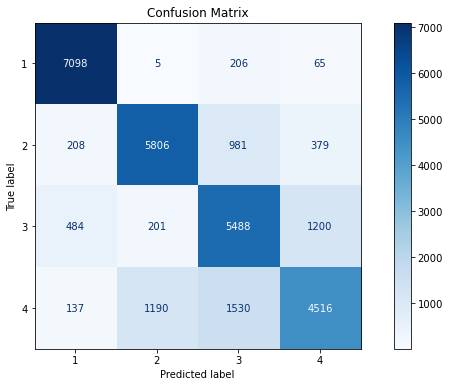

              precision    recall  f1-score   support

           1       0.90      0.96      0.93      7374
           2       0.81      0.79      0.80      7374
           3       0.67      0.74      0.70      7373
           4       0.73      0.61      0.67      7373

    accuracy                           0.78     29494
   macro avg       0.78      0.78      0.77     29494
weighted avg       0.78      0.78      0.77     29494

balanced accuracy: 0.777
roc: 0.935


In [132]:
# Random Forest Classification
randomf_ = RandomForestClassifier(random_state=0)
params_fore = {"n_estimators": [10, 100],
                "criterion":["gini","entropy"],
                "min_samples_leaf":[1,2]
                }
randomf = RandomizedSearchCV(randomf_, params_fore,n_iter=6)
randomf.fit(x_train, y_train)
randomf_predictions = randomf.predict(x_test)
randomf_results = classification_report(y_test, randomf_predictions, zero_division=True, output_dict=True)

#training and training score
score_random= randomf.score(x_train,y_train)
print("training score:{:.3f}".format(score_random))
score_random_test=randomf.score(x_test,y_test)
print("testing score:{:.3f}".format(score_random_test))

#best hyperparameter used
print("Best parameters scores:")
print(randomf.best_params_)

# Confusion matrix and Classification report
conf_matrix(randomf)
print(classification_report(y_test, randomf_predictions))


rf_balanced_accuracy = balanced_accuracy_score(y_test, randomf_predictions)
print("balanced accuracy: {:.3f}".format(rf_balanced_accuracy)) 

# ROC_AUC score

rf_roc = roc_auc_score(y_test, randomf.predict_proba(x_test), multi_class='ovo') 

print("roc: {:.3f}".format(rf_roc)) 
 


In [133]:
logi_pre=precision_score(y_test,randomf_predictions,average="macro")
print("decision tree logistic: {:.3f}".format(logi_pre)) 
rmse = np.sqrt( mean_squared_error(y_test,randomf_predictions))
r2 = r2_score(y_test,randomf_predictions )
recall = recall_score(y_test,randomf_predictions,average="macro")
Fone= f1_score(y_test,randomf_predictions,average="macro")
print("rmse = {:.2f}".format(rmse))
print("r2 = {:.2f}".format(r2))
print("recall = {:.2f}".format(recall))
print("f1 = {:.2f}".format(Fone))

decision tree logistic: 0.776
rmse = 0.71
r2 = 0.59
recall = 0.78
f1 = 0.77


testing score:0.773
training score:0.793
Best parameters scores:
{'n_estimators': 50, 'learning_rate': 0.2, 'booster': 'gbtree'}


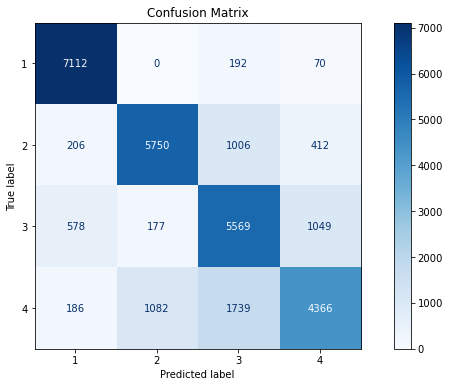

              precision    recall  f1-score   support

           1       0.88      0.96      0.92      7374
           2       0.82      0.78      0.80      7374
           3       0.65      0.76      0.70      7373
           4       0.74      0.59      0.66      7373

    accuracy                           0.77     29494
   macro avg       0.77      0.77      0.77     29494
weighted avg       0.77      0.77      0.77     29494

balanced accuracy: 0.773
roc: 0.936


In [134]:
# XGB Classification


xgb_ = XGBClassifier( random_state=0 , eval_metric="mlogloss"  )
params_xgb = {"learning_rate": [0.1,0.2,0.3],
               
                "n_estimators":[50,10],
                
                "booster":["gbtree","gblinear"]
                }
xgb = RandomizedSearchCV(xgb_, params_xgb)
xgb.fit(x_train, y_train)
xgb_predictions = xgb.predict(x_test)
xgb_results = classification_report(y_test, xgb_predictions, zero_division=True, output_dict=True)

#training and training score
score_xgb=xgb.score(x_test,y_test)
print("testing score:{:.3f}".format(score_xgb))
score_xgb_test= xgb.score(x_train,y_train)
print("training score:{:.3f}".format(score_xgb_test))

#Best hyperparameters
print("Best parameters scores:")
print(xgb.best_params_)

# Confusion matrix and Classification report
conf_matrix(xgb)
print(classification_report(y_test, xgb_predictions))

# balanced_accuracy
xgb_balanced_accuracy = balanced_accuracy_score(y_test, xgb_predictions)
print("balanced accuracy: {:.3f}".format(xgb_balanced_accuracy)) 

# ROC_AUC score
xgb_roc = roc_auc_score(y_test, xgb.predict_proba(x_test), multi_class='ovo') 

print("roc: {:.3f}".format(xgb_roc)) 

In [135]:
logi_pre=precision_score(y_test,xgb_predictions,average="macro")
print("xgb precision : {:.3f}".format(logi_pre)) 
rmse = np.sqrt( mean_squared_error(y_test,xgb_predictions))
r2 = r2_score(y_test,xgb_predictions)
recall = recall_score(y_test,xgb_predictions,average="macro")
Fone= f1_score(y_test,xgb_predictions,average="macro")
print("rmse = {:.3f}".format(rmse))
print("r2 = {:.3f}".format(r2))
print("recall = {:.3f}".format(recall))
print("f1 = {:.3f}".format(Fone))

xgb precision : 0.774
rmse = 0.726
r2 = 0.579
recall = 0.773
f1 = 0.770


testing score:0.710
training score:0.954
Best parameters scores:
{'solver': 'adam', 'learning_rate': 'invscaling', 'activation': 'relu'}


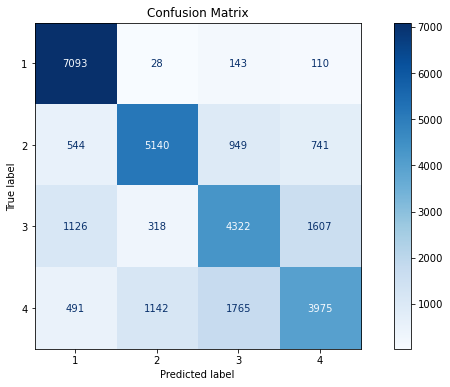

              precision    recall  f1-score   support

           1       0.77      0.96      0.85      7374
           2       0.78      0.70      0.73      7374
           3       0.60      0.59      0.59      7373
           4       0.62      0.54      0.58      7373

    accuracy                           0.70     29494
   macro avg       0.69      0.70      0.69     29494
weighted avg       0.69      0.70      0.69     29494

balanced accuracy: 0.696
roc: 0.896


In [136]:
# Multi-layer Perceptron classifier. 
mlpc_= MLPClassifier( learning_rate='invscaling', random_state = 0,max_iter=10)
params_mlp = {"activation": ["tanh","relu"],
                "solver":["lbfgs","sgd","adam"],
                "learning_rate":["constant","invscaling","adaptive"]
                }
mlpc = RandomizedSearchCV(mlpc_, params_mlp,n_iter=6)
mlpc.fit(x_train, y_train)
mlpc_predictions = mlpc.predict(x_test)
mlpc_cla_results = classification_report(y_test, mlpc_predictions, zero_division=True, output_dict=True)

#training and training score
score_dt=decision_tree.score(x_test,y_test)
print("testing score:{:.3f}".format(score_dt))
score_dt_test= decision_tree.score(x_train,y_train)
print("training score:{:.3f}".format(score_dt_test))

#best hyperparameters
print("Best parameters scores:")
print(mlpc.best_params_)

# Confusion matrix and Classification report
conf_matrix(mlpc)
print(classification_report(y_test, mlpc_predictions))

# balanced_accuracy
mlpc_balanced_accuracy = balanced_accuracy_score(y_test, mlpc_predictions)
print("balanced accuracy: {:.3f}".format(mlpc_balanced_accuracy)) 

# ROC_AUC score
mlpc_roc = roc_auc_score(y_test, mlpc.predict_proba(x_test), multi_class='ovo', average='macro') 
print("roc: {:.3f}".format(mlpc_roc)) 

In [137]:
logi_pre=precision_score(y_test,mlpc_predictions,average="macro")
print("MLP precision : {:.3f}".format(logi_pre)) 
rmse = np.sqrt( mean_squared_error(y_test,mlpc_predictions))
r2 = r2_score(y_test,mlpc_predictions)
recall = recall_score(y_test,mlpc_predictions,average="macro")
Fone= f1_score(y_test,mlpc_predictions,average="macro")
print("rmse = {:.2f}".format(rmse))
print("r2 = {:.2f}".format(r2))
print("recall = {:.2f}".format(recall))
print("f1 = {:.2f}".format(Fone))

MLP precision : 0.690
rmse = 0.89
r2 = 0.37
recall = 0.70
f1 = 0.69


In [138]:
# Gradient Boosting Classification
gb_ = GradientBoostingClassifier( random_state=0)
params_gb = {"learning_rate": [0.1,0.01],
             "n_estimators":[100,1000],
             "min_samples_leaf":[2,1]
                }
gb = RandomizedSearchCV(gb_, params_gb,n_iter=3,n_jobs=-1)
gb.fit(x_train, y_train)
gb_predictions = gb.predict(x_test)
gb_results = classification_report(y_test, gb_predictions, zero_division=True, output_dict=True)

#training and training score
score_gb=gb.score(x_test,y_test)
print("testing score:{:.3f}".format(score_gb))
score_gb_test= gb.score(x_train,y_train)
print("training score:{:.3f}".format(score_gb_test))

#best hyperparameters
print("Best parameters scores:")
print(gb.best_params_)

# Confusion matrix and Classification report
conf_matrix(gb)
print(classification_report(y_test, gb_predictions, zero_division=True))

# balanced_accuracy

gb_balanced_accuracy = balanced_accuracy_score(y_test, gb_predictions)
print("balanced accuracy: {:.3f}".format(gb_balanced_accuracy)) 

# ROC_AUC score

gb_roc = roc_auc_score(y_test, gb.predict_proba(x_test), multi_class='ovo', average='macro') 
print("roc: {:.3f}".format(gb_roc)) 

In [ ]:
logi_pre=precision_score(y_test,gb_predictions,average="macro")
print("GB precision : {:.3f}".format(logi_pre)) 
rmse = np.sqrt( mean_squared_error(y_test,gb_predictions))
r2 = r2_score(y_test,gb_predictions)
recall = recall_score(y_test,gb_predictions,average="macro")
Fone= f1_score(y_test,gb_predictions,average="macro")
print("rmse = {:.3f}".format(rmse))
print("r2 = {:.3f}".format(r2))
print("recall = {:.3f}".format(recall))
print("f1 = {:.3f}".format(Fone))

GB precision : 0.758
rmse = 0.750
r2 = 0.550
recall = 0.759
f1 = 0.755


testing score:0.344
training score:0.351
Best parameters scores:
{'solver': 'saga'}


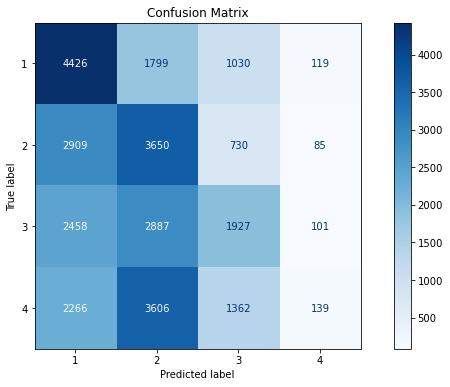

              precision    recall  f1-score   support

           1       0.37      0.60      0.46      7374
           2       0.31      0.49      0.38      7374
           3       0.38      0.26      0.31      7373
           4       0.31      0.02      0.04      7373

    accuracy                           0.34     29494
   macro avg       0.34      0.34      0.29     29494
weighted avg       0.34      0.34      0.29     29494

balanced accuracy: 0.344
roc: 0.660


In [ ]:
# SVC
svc_ = SVC(max_iter=70,random_state=0,probability=True)
params_svc = {"gamma": [0.1, 0.01,"auto"],
          
          "kernel":["linear","poly","rbf"],
          "C":[10,1]
           }
svc = RandomizedSearchCV(svc_, params_svc,n_iter=5)
svc.fit(x_train, y_train)
svc_predictions = svc.predict(x_test)
svc_results = classification_report(y_test, svc_predictions, zero_division=True, output_dict=True)

#training and training score
score_svc=svc.score(x_test,y_test)
print("testing score:{:.3f}".format(score_svc))
score_svc_test= svc.score(x_train,y_train)
print("training score:{:.3f}".format(score_svc_test))

#best hyperparameters
print("Best parameters scores:")
print(logistic_regression.best_params_)

# Confusion matrix and Classification report
conf_matrix(svc)
print(classification_report(y_test, svc_predictions, zero_division=True))

# balanced_accuracy

svc_balanced_accuracy = balanced_accuracy_score(y_test, svc_predictions)
print("balanced accuracy: {:.3f}".format(svc_balanced_accuracy)) 

# ROC_AUC score
svc_roc= roc_auc_score(y_test, svc.predict_proba(x_test), multi_class='ovo', average='macro') 

print("roc: {:.3f}".format(svc_roc)) 

In [ ]:
logi_pre=precision_score(y_test,svc_predictions,average="macro")
print("svc precision : {:.3f}".format(logi_pre)) 
rmse = np.sqrt( mean_squared_error(y_test,svc_predictions))
r2 = r2_score(y_test,svc_predictions)
recall = recall_score(y_test,svc_predictions,average="macro")
Fone= f1_score(y_test,svc_predictions,average="macro")
print("rmse = {:.3f}".format(rmse))
print("r2 = {:.3f}".format(r2))
print("recall = {:.3f}".format(recall))
print("f1 = {:.3f}".format(Fone))

svc precision : 0.342
rmse = 1.426
r2 = -0.627
recall = 0.344
f1 = 0.295
